## K-means

Uruchom poniższe demo i poeksperymentuj z różnymi przykładami danych - na których k-means działa dobrze a na których źle?

Demo:  
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

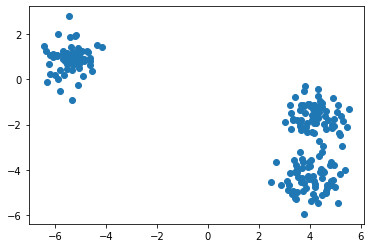

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

features, labels = make_blobs(n_samples=200, n_features=2,centers = 3, cluster_std=0.6, random_state=123)

plt.scatter(features[:,0], features[:,1])
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [5]:
?KMeans

In [8]:
model = KMeans(n_clusters=3)

cluster_labels = model.fit_predict(features)

cluster_labels

Zróbmy klasteryzację k-means i zwizualizujmy wyniki

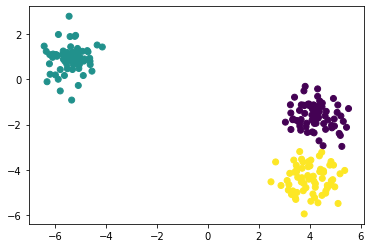

In [9]:
plt.scatter(features[:,0], features[:,1],c=cluster_labels)
plt.show()

In [10]:
model.cluster_centers_

array([[ 4.23149117, -1.61590155],
       [-5.3961543 ,  0.91110288],
       [ 4.01047015, -4.4067504 ]])

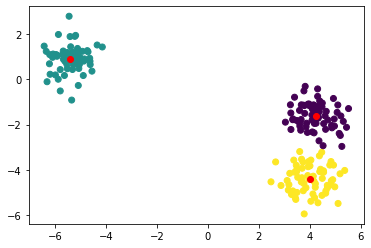

In [11]:
plt.scatter(features[:,0], features[:,1],c=cluster_labels)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],c="red")
plt.show()

In [12]:
model = KMeans(n_clusters=3, verbose=1)
model.fit(features)

Initialization complete
Iteration 0, inertia 220.23382002299482
Iteration 1, inertia 138.11536793056447
Iteration 2, inertia 134.7530684651172
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 293.0415389011587
Iteration 1, inertia 134.8161164210664
Converged at iteration 1: center shift 0.0009430188070546183 within tolerance 0.0012753511285327481.
Initialization complete
Iteration 0, inertia 199.20902585568365
Iteration 1, inertia 134.9897763024364
Iteration 2, inertia 134.7530684651172
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 204.24885775387833
Iteration 1, inertia 135.37526128194452
Iteration 2, inertia 134.7530684651172
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 202.2569562776162
Iteration 1, inertia 134.9897763024364
Iteration 2, inertia 134.7530684651172
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia

KMeans(n_clusters=3, verbose=1)

### Transformacja zmiennych

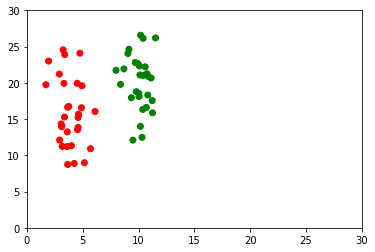

In [13]:
import numpy as np
import numpy.random as rnd

rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

Zadanie: dopasować model z 2 klastrami, pokolorować grupy i zaznaczyć średnie

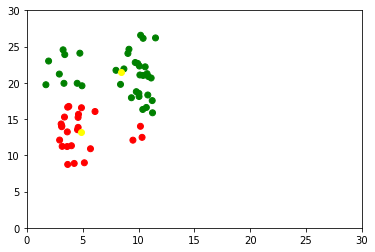

In [15]:
model = KMeans(n_clusters=2)
groups = model.fit_predict(points)


plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[groups])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],c="yellow")
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

Grupowanie nastąpiło względem zmiennej y..

Gdy różnica na osi y jest znacząco większa niż rożnica na osi x (y >>x)- patrząc na odegłość euklidesową w takiej sytuacji zachodzi:

$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} \approx \sqrt{(y_1-y_2)^2})$

Czyli grupowanie opiera się na zmiennej (zmiennych) dominującej

Dołóżmy standaryzację zmiennych

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

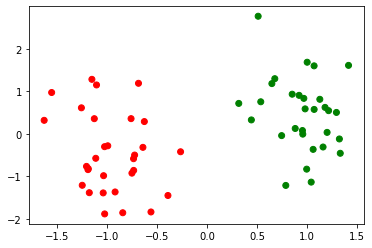

In [19]:
plt.scatter(scaled_points[:,0],scaled_points[:,1],c = np.array(["red","green"])[labels])
plt.show()

Wykonajmy teraz klasteryzację

In [20]:
model = KMeans(n_clusters=2)

In [21]:
groups = model.fit_predict(scaled_points)

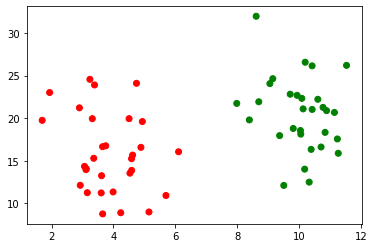

In [23]:
plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[groups])
plt.show()

In [24]:
inverse_cluster_centers = scaler.inverse_transform(model.cluster_centers_)

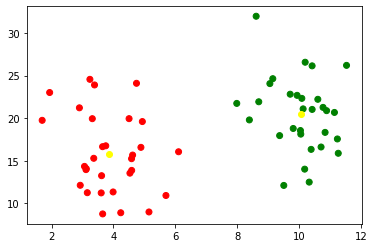

In [25]:
plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[groups])
plt.scatter(inverse_cluster_centers[:,0], inverse_cluster_centers[:,1],c="yellow")
plt.show()

Zróbmy wersję z pipelinem (standaryzacja + kmeans):

In [26]:
from sklearn.pipeline import make_pipeline

In [27]:
pipeline = make_pipeline(StandardScaler(),KMeans(n_clusters=2))

In [28]:
cluster_labels = pipeline.fit_predict(points)

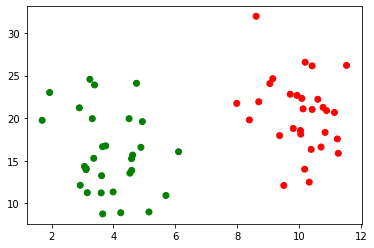

In [29]:
plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[cluster_labels])
plt.show()

Transformacja obserwacji

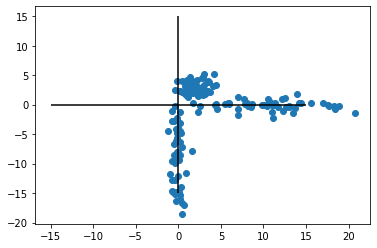

In [30]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

# 1 przypadek
# 1 0
# 0 1

# 2 przypadek
# 30 0
# 0 0.5

Zadanie: dopasować model i zwizualizować

In [31]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(points)

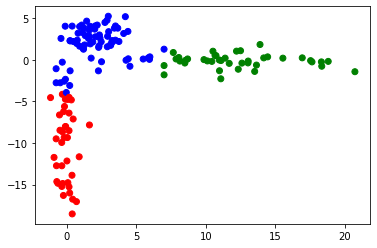

In [32]:
plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[groups])
plt.show()

Jak zmieni się rezultat jak zrobimy standaryzację?

In [33]:
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
cluster_labels = pipeline.fit_predict(points)

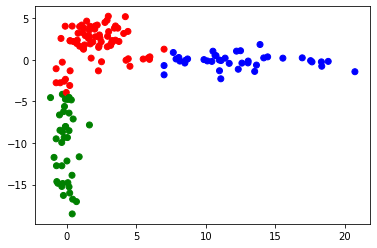

In [34]:
plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[cluster_labels])
plt.show()

Użyjmy normalizacji (skalowanie na poziomie pojedynczej obserwacji)

In [35]:
from sklearn.preprocessing import Normalizer

In [43]:
?Normalizer

In [50]:
normalizer = Normalizer(norm="max")

In [51]:
points2 = normalizer.fit_transform(points)

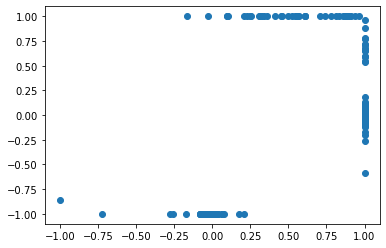

In [52]:
plt.scatter(points2[:,0],points2[:,1])
plt.show()

In [53]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(points2)

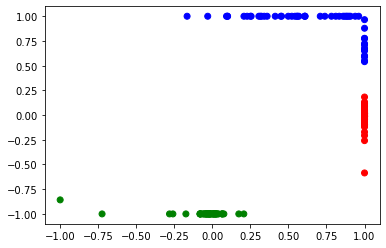

In [54]:
plt.scatter(points2[:,0],points2[:,1],c=np.array(["red","green","blue"])[groups])
plt.show()

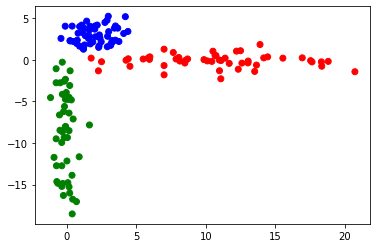

In [55]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[groups])
plt.show()

Kiedy można użyć normalizacji?  
np gdy interesują nas proporcje (poszczególne zmienne dotyczą podobnych cech) np. grupowanie dokumentów na podstawie treści (dokumenty mogą być różnej długości)

## Klasteryzacja danych klasyfikacyjnych

Zbiór irysy

In [56]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Zrób histogram dla poszczególnych cech

In [57]:
import pandas as pd

In [58]:
data = pd.DataFrame(iris.data)

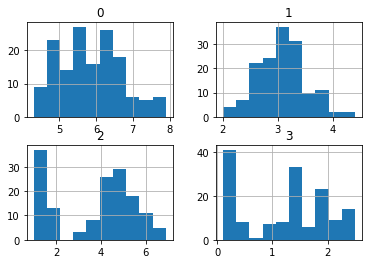

In [59]:
data.hist()
plt.show()

In [61]:
data.columns = iris.feature_names
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
data['class']=iris.target

In [63]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Zwizualizuj w seaborn poszczególne pary cech

In [64]:
import seaborn as sns

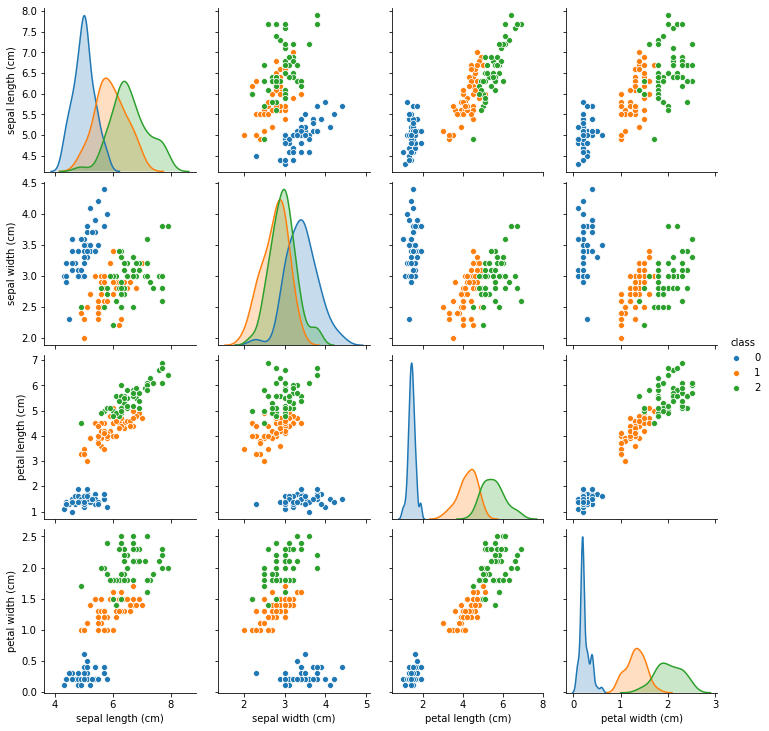

In [65]:
sns.pairplot(data, hue='class')

Zróbmy klasteryzację k-means oraz wyliczmy metrykę V-measure na klasach

In [66]:
model = KMeans(n_clusters=3)

In [67]:
groups = model.fit_predict(iris.data)

In [68]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

In [69]:
?homogeneity_score

In [70]:
homogeneity_score(iris.target, groups)

0.7514854021988338

In [71]:
completeness_score(iris.target, groups)

0.7649861514489815

In [72]:
v_measure_score(iris.target, groups)

0.7581756800057784

#### zbiór Wina

In [73]:
from sklearn.datasets import load_wine

wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Zróbmy klasteryzację k-means i wyliczmy V-measure

In [74]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(wine.data)

In [75]:
v_measure_score(wine.target, groups)

0.4287568597645355

Zróbmy histogram cech

In [76]:
data = pd.DataFrame(wine.data)
data.columns = wine.feature_names

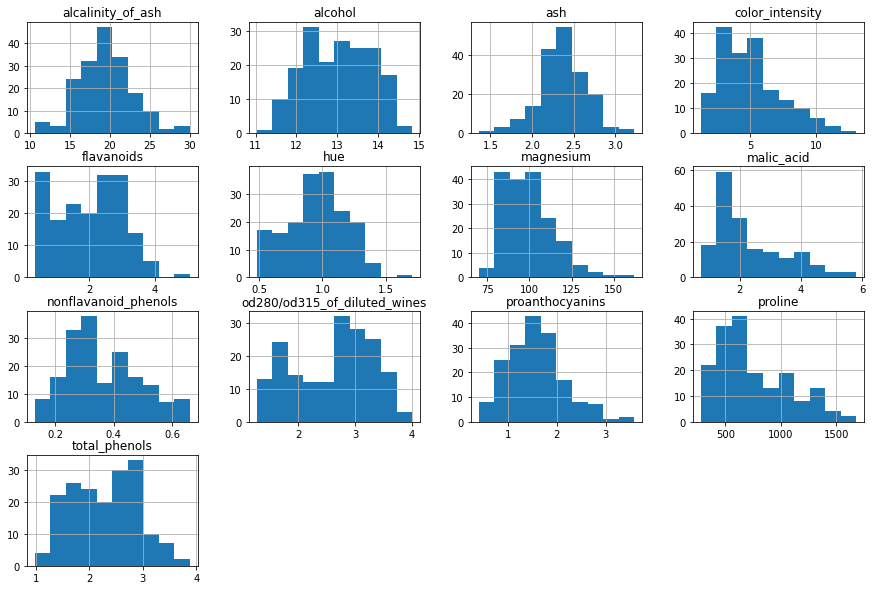

In [78]:
data.hist(figsize=(15,10))
plt.show()

Wykonajmy standaryzację danych

In [79]:
scaler = StandardScaler()

In [80]:
scaled_data = scaler.fit_transform(wine.data)

Ponownie zróbmy klasteryzację i wyliczmy V-measure

In [81]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(scaled_data)

In [82]:
v_measure_score(wine.target, groups)

0.875893534122307

## Wyznaczanie liczby klastrów

In [7]:
import numpy as np

In [9]:
import numpy.random as rnd

In [11]:
import matplotlib.pyplot as plt

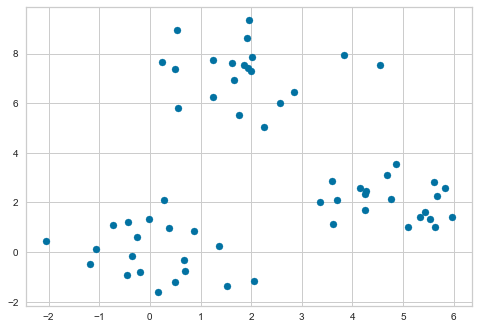

In [12]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))

points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

plt.scatter(points[:,0],points[:,1])

plt.show()

Zadanie: Zwizualizuj różną liczbę klastrów (1-6) oraz ich środki. Następnie przedstaw wykres inercji od liczby klastrów.

In [84]:
model = KMeans(n_clusters=2)
labels = model.fit_predict(points)

model.inertia_

385.3550597598524

C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


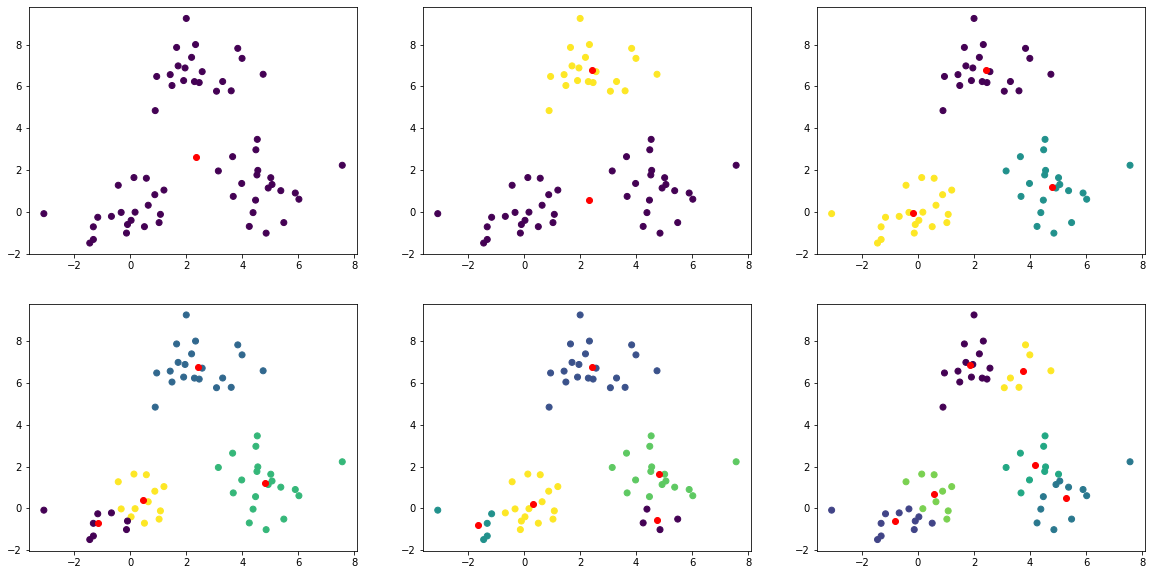

In [86]:
inertias = []

plt.figure(figsize=(20,10))
for k in range(1,7):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(points)

    inertias.append(model.inertia_)
    
    plt.subplot(2,3,k)
    plt.scatter(points[:,0],points[:,1],c=labels)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],c="red")

plt.show()

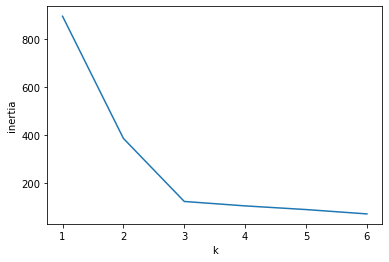

In [88]:
plt.plot(range(1,7), inertias)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

Zrób wykres Silhouette score od liczby klastrów

In [28]:
from sklearn.metrics import silhouette_score

In [93]:
?silhouette_score

Zróbmy wykres dla metryk Davies-Bouldin score

In [27]:
from sklearn.metrics import davies_bouldin_score

In [94]:
?davies_bouldin_score

In [96]:
ks = range(2,7)
silhouette = []
dbi = []

In [97]:
for k in ks:
    model = KMeans(n_clusters=k)
    groups = model.fit_predict(points)
    silhouette.append(silhouette_score(points, groups))
    dbi.append(davies_bouldin_score(points, groups))

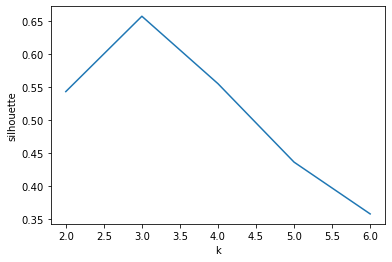

In [98]:
plt.plot(ks, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()

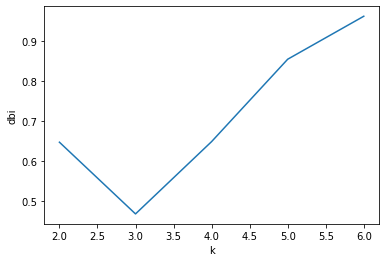

In [99]:
plt.plot(ks, dbi)
plt.xlabel('k')
plt.ylabel('dbi')
plt.show()

Zwizualizujmy to jeszcze z użyciem biblioteki yellowbrick

In [100]:
pip install yellowbrick==1.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
from yellowbrick.cluster import KElbowVisualizer

In [4]:
from yellowbrick.cluster import SilhouetteVisualizer

In [5]:
from sklearn.cluster import KMeans

C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


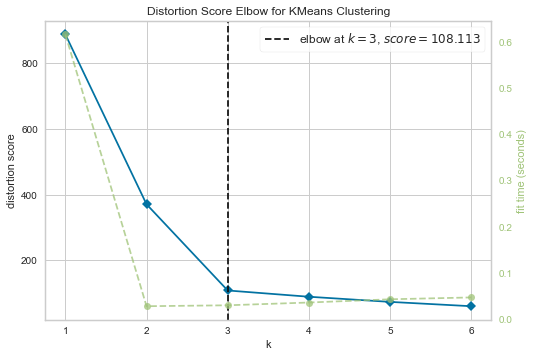

In [13]:
vis = KElbowVisualizer(KMeans(),k=(1,7))
vis.fit(points)
vis.show()

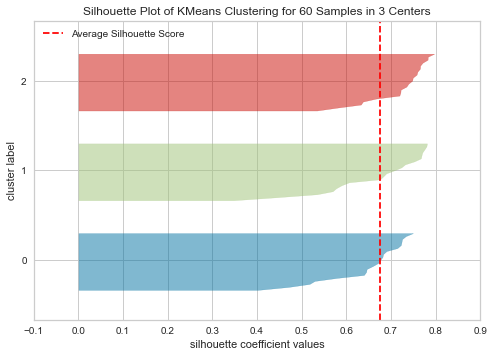

In [14]:
model = KMeans(n_clusters=3)
vis = SilhouetteVisualizer(model, colors='yellowbrick')
vis.fit(points)
vis.show()

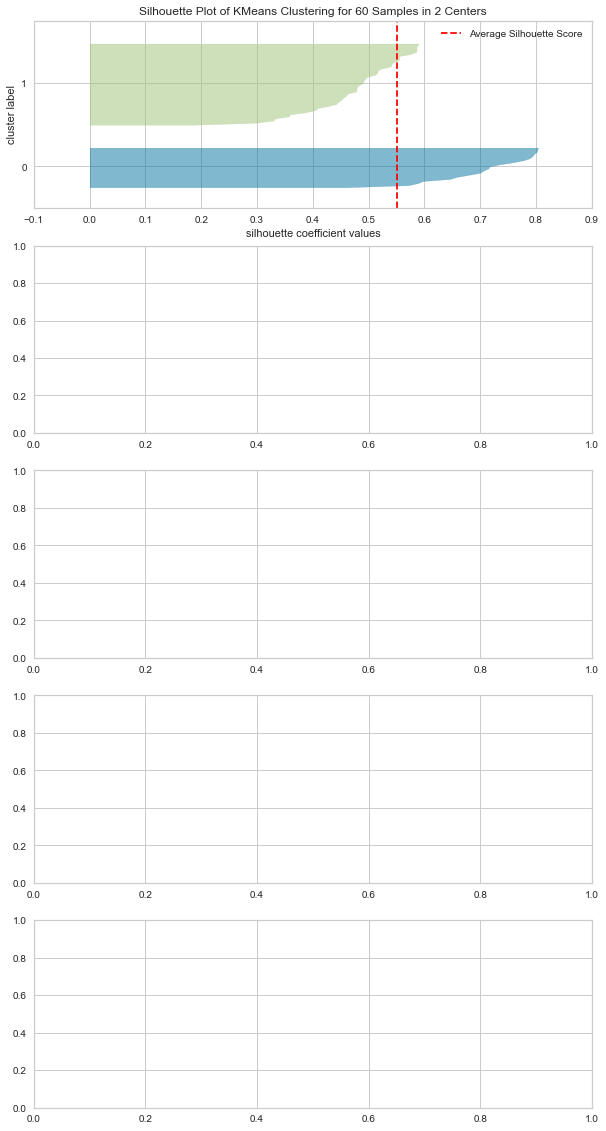

In [18]:
fig, ax = plt.subplots(5, figsize=(10,20))

i = 0
for k in range(2,7):
    model = KMeans(n_clusters=k)
    vis = SilhouetteVisualizer(model, ax=ax[i], colors='yellowbrick')
    vis.fit(points)
    vis.show()
    i+=1

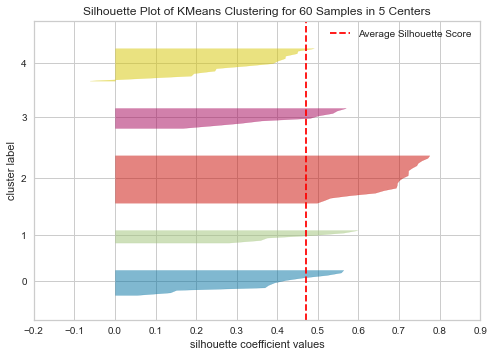

In [24]:

model = KMeans(n_clusters=5)
vis = SilhouetteVisualizer(model, colors='yellowbrick')
vis.fit(points)
vis.show()


Zadanie: Spróbuj wyznaczyć liczbę klastrów dla poniższych danych

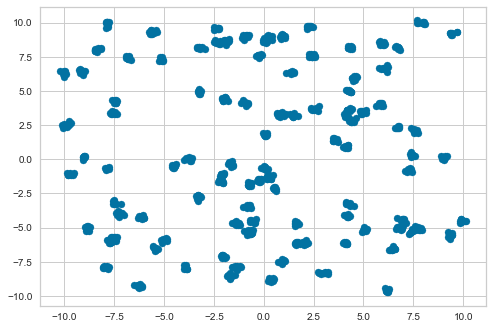

In [25]:
from sklearn.datasets import make_blobs

points, l = make_blobs(1000,centers=100,cluster_std=0.1)

plt.scatter(points[:,0],points[:,1])
plt.show()

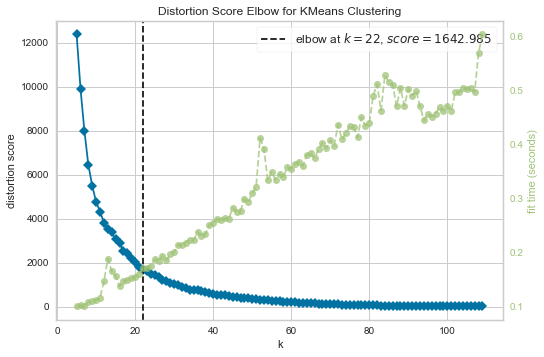

In [26]:
vis = KElbowVisualizer(KMeans(),k=(5,110))
vis.fit(points)
vis.show()

In [29]:
inertias = []
dbi = []
silhouette = []

ks = range(5,111)
for k in ks:
    model = KMeans(n_clusters=k)
    groups = model.fit_predict(points)
    inertias.append(model.inertia_)
    silhouette.append(silhouette_score(points, groups))
    dbi.append(davies_bouldin_score(points, groups))
    

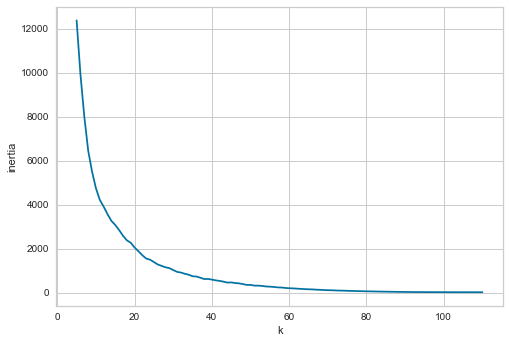

In [30]:
plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

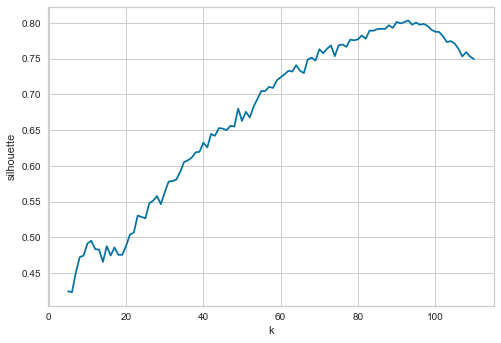

In [31]:
plt.plot(ks, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()

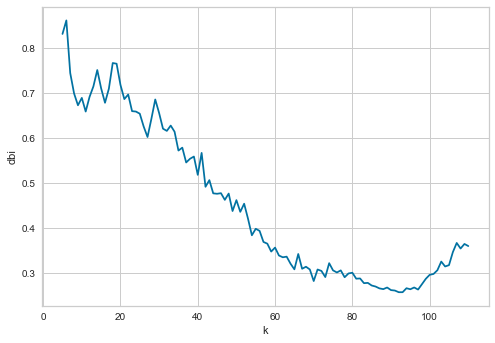

In [32]:
plt.plot(ks, dbi)
plt.xlabel('k')
plt.ylabel('dbi')
plt.show()

Ćwiczenie - wyznacz liczbę klastrów na zbiorze win

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
wine

## Grupowanie hierarchiczne

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

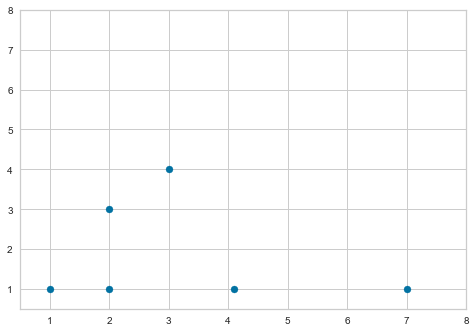

In [34]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

In [35]:
d = linkage(dane, "single") # 0,1 - ktore klastry laczymy, 2 - odleglosc miedzy nimi, 3 - wielkosc klastra po polaczeniu
d

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [6.        , 7.        , 2.        , 4.        ],
       [2.        , 8.        , 2.1       , 5.        ],
       [3.        , 9.        , 2.9       , 6.        ]])

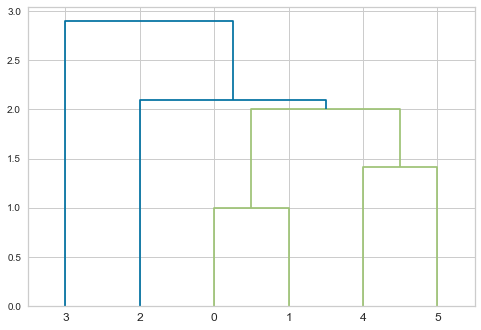

In [36]:
dendrogram(d)
plt.show()

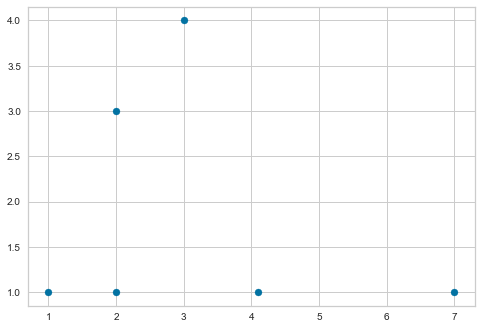

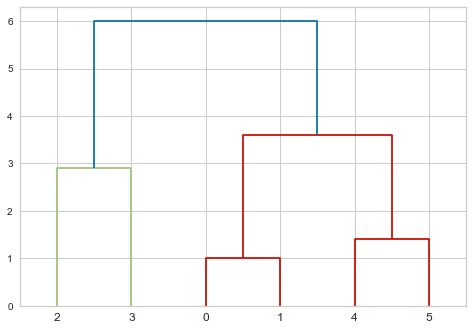

In [37]:
d = linkage(dane,"complete")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

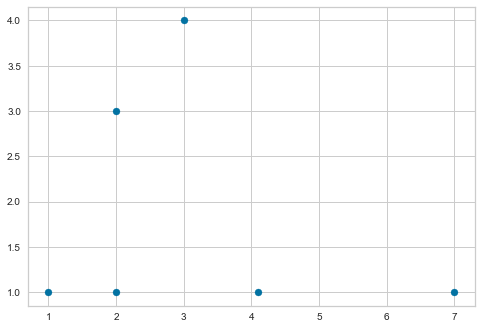

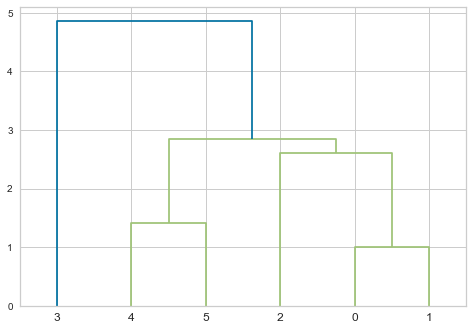

In [38]:
d = linkage(dane,"average")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

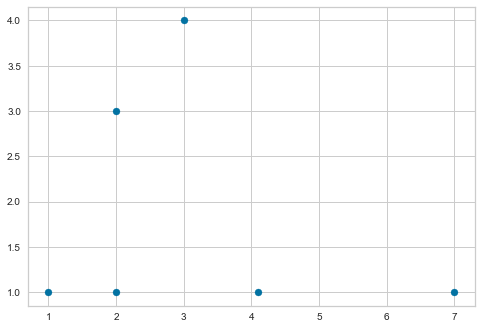

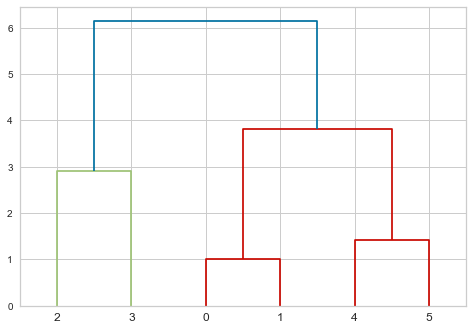

In [39]:
d = linkage(dane,"ward")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

Zobaczmy jak działają poszczególne metody łączenia klastrów na nieco większych danych

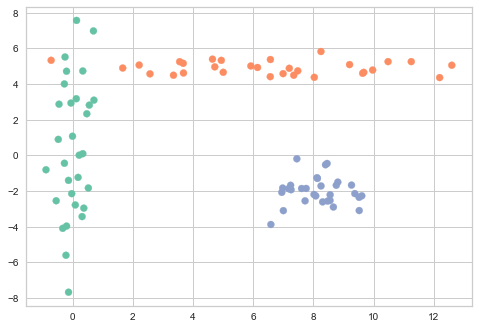

In [40]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
labels = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
plt.show()

In [41]:
?dendrogram

In [ ]:
# na osi x w dendrogramie numery klas

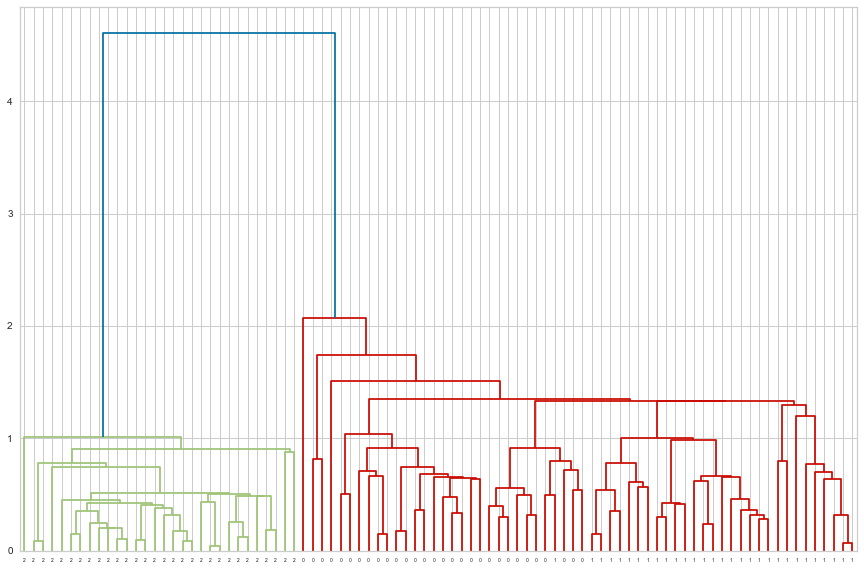

In [45]:
plt.figure(figsize=(15,10))
l = linkage(points,method="single")
dendrogram(l, labels=labels.tolist(),leaf_rotation=0)
plt.show()

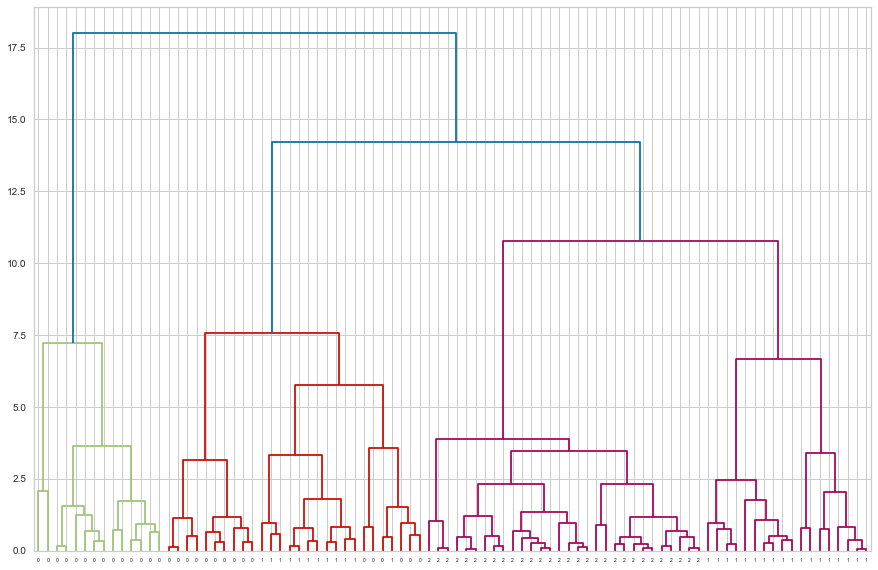

In [46]:
plt.figure(figsize=(15,10))
l = linkage(points,method="complete")
dendrogram(l, labels=labels.tolist(),leaf_rotation=0)
plt.show()

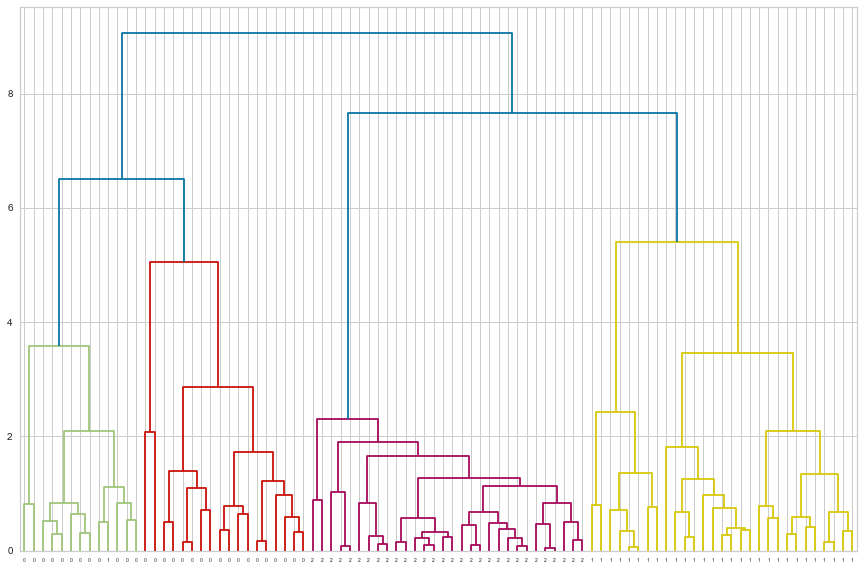

In [47]:
plt.figure(figsize=(15,10))
l = linkage(points,method="average")
dendrogram(l, labels=labels.tolist(),leaf_rotation=0)
plt.show()

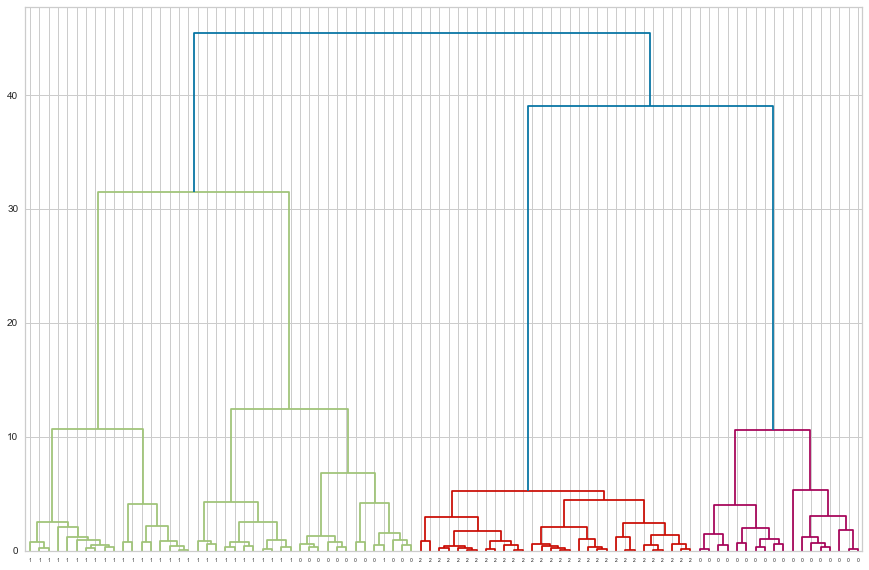

In [48]:
plt.figure(figsize=(15,10))
l = linkage(points,method="ward")
dendrogram(l, labels=labels.tolist(),leaf_rotation=0)
plt.show()

Inny przypadek - klastry bliżej siebie

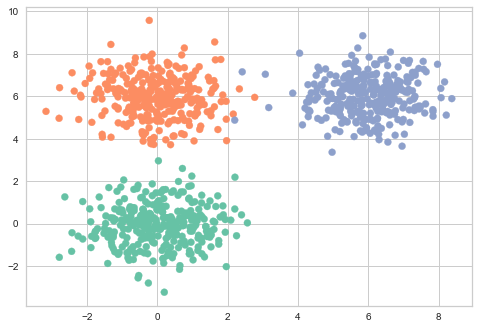

In [49]:
rnd.seed(123)
p_num=300
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),p_num),
                    rnd.multivariate_normal((0,6),np.array([[1,0],[0,1]]),p_num),
                    rnd.multivariate_normal((6,6),np.array([[1,0],[0,1]]),p_num)],axis=0)
labels = np.repeat(range(3),p_num)

import seaborn as sns
colors = sns.color_palette("Set2", 20)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
plt.show()

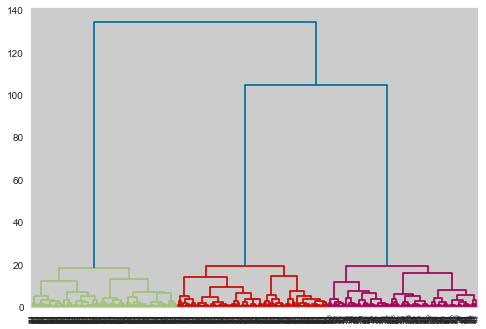

In [53]:
l = linkage(points,method="ward")
dendrogram(l)
plt.show()

Zbiór z 2 liniami punktów

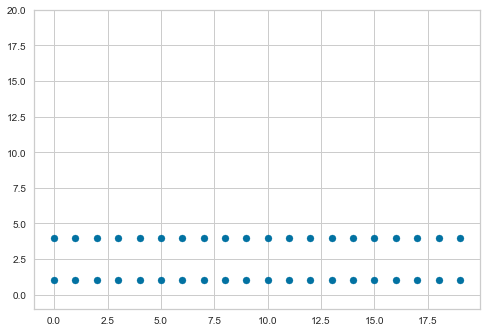

In [54]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T

plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

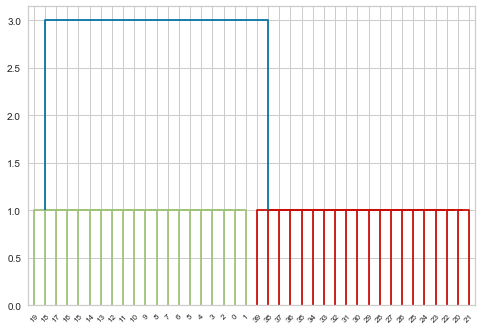

In [57]:
l = linkage(x,method="single")
dendrogram(l)
plt.show()

Zbiór ziarna zbóż

In [60]:
import pandas as pd

In [58]:
samples = np.loadtxt("Data/seeds_dataset.txt")

In [61]:
samples = pd.DataFrame(samples)
samples

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [62]:
samples.columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", 
                   "kernel_groove_length", "variety"]

In [63]:
samples.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [64]:
samples.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


Przeanalizuj zachowanie różnych łączeń klastrów - najpierw na surowych danych, a później na przeskalowanych

### Wyznaczenie liczby klastrów

Przykład

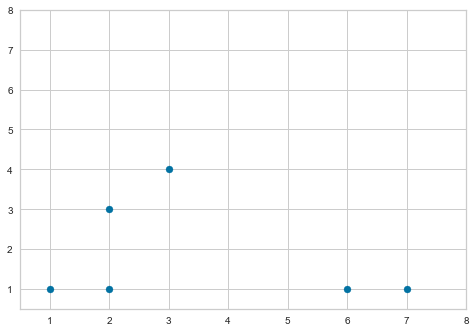

In [65]:
dane = np.array([[1,1],[2,1],[6,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

Na podstawie dendrogramu

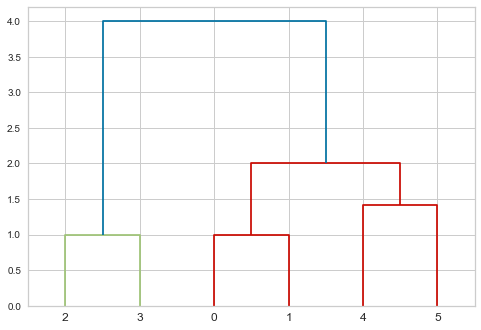

In [66]:
mergings = linkage(dane,method="single")
dendrogram(mergings)
plt.show()

Obcinamy tam, gdzie skok jest duży albo na poziomie, który wydaje się nam najsensowniejszy. Możemy obciąć wg odległości

In [70]:
from scipy.cluster.hierarchy import fcluster

?fcluster

In [68]:
mergings

array([[0.        , 1.        , 1.        , 2.        ],
       [2.        , 3.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [6.        , 8.        , 2.        , 4.        ],
       [7.        , 9.        , 4.        , 6.        ]])

In [69]:
fcluster(mergings,t=0.5,criterion="distance")

array([3, 4, 1, 2, 5, 6], dtype=int32)

In [71]:
fcluster(mergings,t=1,criterion="distance")

array([2, 2, 1, 1, 3, 4], dtype=int32)

In [72]:
fcluster(mergings,t=1.5,criterion="distance")

array([2, 2, 1, 1, 3, 3], dtype=int32)

In [73]:
fcluster(mergings,t=3,criterion="distance")

array([2, 2, 1, 1, 2, 2], dtype=int32)

Gdy wiemy ile chcemy mieć klastrów, możemy obciąć po liczbie klastrów

In [74]:
fcluster(mergings, 3, 'maxclust')

array([2, 2, 1, 1, 3, 3], dtype=int32)

Wyznaczyć liczbę klastrów dla zbioru ziaren

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc = StandardScaler()

In [77]:
samples2 = pd.DataFrame(sc.fit_transform(samples.iloc[:,0:-1]), columns=samples.columns[:-1])

In [79]:
samples2["variety"] = samples.variety

In [80]:
samples2.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1.0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1.0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1.0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1.0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1.0


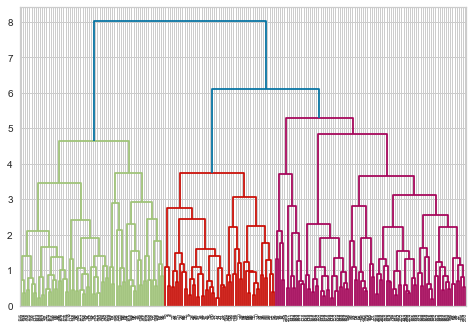

In [83]:
l = linkage(samples2.iloc[:,0:-1],method="complete")
dendrogram(l)
plt.show()

Zadanie: pogrupować hierarchicznie kraje na podstawie oddanych przez nie głosów w Eurowizji

In [84]:
from scipy.io import loadmat
eurowizja = loadmat("Data/eu_song_2014.mat")
eurowizja

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon May 12 00:30:15 2014',
 '__version__': '1.0',
 '__globals__': [],
 'x': MatlabObject([[(array([[ 0,  0,  0,  0,  0,  0,  0,  6,  0,  2,  5,  4,  7,  0,  0, 10,
          0,  0, 12,  0,  8,  1,  0,  0,  3,  0],
        [ 0,  8,  0,  0,  0,  0,  0, 12,  0,  7,  0,  6,  0,  0, 10,  0,
          0,  0,  2,  5,  0,  0,  1,  4,  3,  0],
        [ 5,  0,  0,  2,  1,  8, 12,  0,  0,  0,  0,  0,  6,  0,  0,  0,
          0,  4,  0,  3,  7,  0,  0, 10,  0,  0],
        [10,  7,  0,  0,  0,  6,  0,  0,  2,  4,  1,  0,  0,  0, 12,  0,
          0,  0,  0,  0,  8,  5,  0,  0,  3,  0],
        [ 8,  0,  3,  0,  4,  1, 10,  0,  7,  6,  0,  0,  0,  0, 12,  0,
          0,  0,  0,  0,  5,  0,  0,  2,  0,  0],
        [ 4,  0,  0,  0,  0,  5,  0,  0,  0,  0, 12,  0, 10,  0,  0,  0,
          0,  3,  2,  0,  7,  0,  6,  8,  0,  1],
        [ 1,  0,  0,  5,  6,  0,  2,  0,  0,  0,  8,  0, 12,  0,  0,  0,
          0,  4,  0,  0,  3, 

In [85]:
eurowizja = loadmat("Data/eu_song_2014.mat")["x"][0][0]
dane = eurowizja[0]
rows = eurowizja[1][0][0]
columns = eurowizja[5]
columns

array(['Ukraine       ', 'Belarus       ', 'Azerbaijan    ',
       'Iceland       ', 'Norway        ', 'Romania       ',
       'Armenia       ', 'Montenegro    ', 'Greece        ',
       'Poland        ', 'Austria       ', 'Germany       ',
       'Sweden        ', 'France        ', 'Russia        ',
       'Italy         ', 'Slovenia      ', 'Finland       ',
       'Spain         ', 'Switzerland   ', 'Hungary       ',
       'Malta         ', 'Denmark       ', 'Netherlands   ',
       'San Marino    ', 'United Kingdom'], dtype='<U14')

In [86]:
dane = pd.DataFrame(dane,columns=columns)
dane.set_index(rows,inplace=True)
dane.head()


,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0


In [87]:
dane.sum(axis=1)

Albania           58
Armenia           58
Austria           58
Azerbaijan        58
Belarus           58
Belgium           58
Denmark           58
Estonia           58
Finland           58
France            58
Georgia           58
Germany           58
Greece            58
Hungary           58
Iceland           58
Ireland           58
Israel            58
Italy             58
Latvia            58
Lithuania         58
Macedonia         58
Malta             58
Moldova           58
Montenegro        58
Netherlands       58
Norway            58
Poland            58
Portugal          58
Romania           58
Russia            58
San_Marino        58
Slovenia          58
Spain             58
Sweden            58
Switzerland       58
Ukraine           58
United_Kingdom    58
dtype: int64

In [90]:
dane.index

Index(['Albania       ', 'Armenia       ', 'Austria       ', 'Azerbaijan    ',
       'Belarus       ', 'Belgium       ', 'Denmark       ', 'Estonia       ',
       'Finland       ', 'France        ', 'Georgia       ', 'Germany       ',
       'Greece        ', 'Hungary       ', 'Iceland       ', 'Ireland       ',
       'Israel        ', 'Italy         ', 'Latvia        ', 'Lithuania     ',
       'Macedonia     ', 'Malta         ', 'Moldova       ', 'Montenegro    ',
       'Netherlands   ', 'Norway        ', 'Poland        ', 'Portugal      ',
       'Romania       ', 'Russia        ', 'San_Marino    ', 'Slovenia      ',
       'Spain         ', 'Sweden        ', 'Switzerland   ', 'Ukraine       ',
       'United_Kingdom'],
      dtype='object')

In [88]:
mergings = linkage(dane, method="ward")

In [92]:
?dendrogram

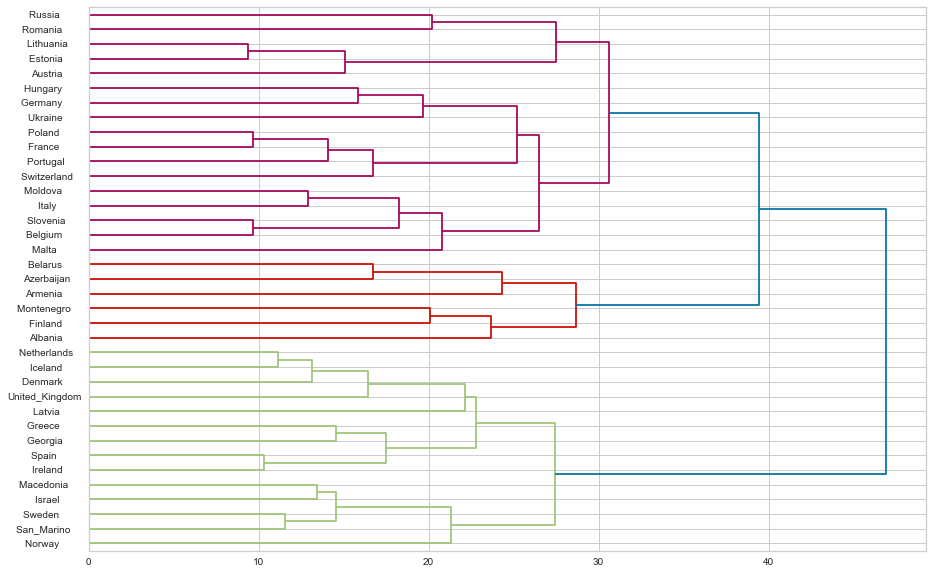

In [96]:
plt.figure(figsize=(15,10))
dendrogram(mergings, labels=dane.index.tolist(), orientation="right", leaf_font_size=10)
plt.show()

In [97]:
'Estonia'.ljust(14)

'Estonia       '

In [98]:
dane.loc[['Estonia'.ljust(14),'Lithuania'.ljust(14)],:]

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Estonia,8,0,0,0,3,0,5,0,0,0,...,0,6,2,0,7,0,0,12,0,0
Lithuania,7,0,0,0,5,0,10,0,0,0,...,0,3,4,0,1,0,0,12,0,0


Zadanie: Potestować różne przekształcenia danych i ocenić czy dla innych postaci danych wyniki są bardziej zgodne z intuicją. Spróbować wyciągnąć wnioski.

In [99]:
from sklearn.preprocessing import Normalizer

In [100]:
norm = Normalizer()
norm_dane = norm.fit_transform(dane)

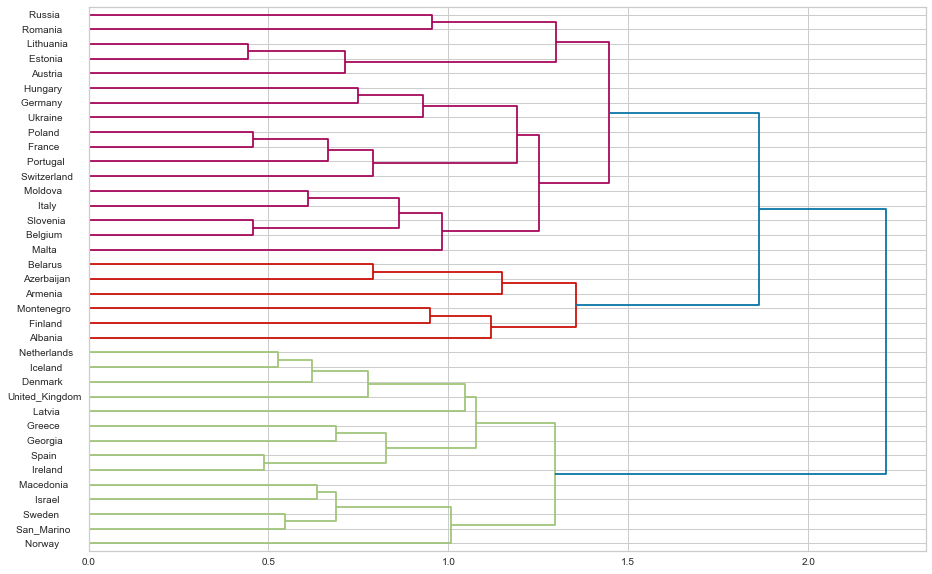

In [101]:
mergings = linkage(norm_dane, method="ward")
plt.figure(figsize=(15,10))
dendrogram(mergings, labels=dane.index.tolist(), orientation="right", leaf_font_size=10)
plt.show()

In [102]:
dane2 = dane>0
dane2

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,False,False,False,False,False,False,False,True,False,True,...,False,False,True,False,True,True,False,False,True,False
Armenia,False,True,False,False,False,False,False,True,False,True,...,False,False,True,True,False,False,True,True,True,False
Austria,True,False,False,True,True,True,True,False,False,False,...,False,True,False,True,True,False,False,True,False,False
Azerbaijan,True,True,False,False,False,True,False,False,True,True,...,False,False,False,False,True,True,False,False,True,False
Belarus,True,False,True,False,True,True,True,False,True,True,...,False,False,False,False,True,False,False,True,False,False
Belgium,True,False,False,False,False,True,False,False,False,False,...,False,True,True,False,True,False,True,True,False,True
Denmark,True,False,False,True,True,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,True
Estonia,True,False,False,False,True,False,True,False,False,False,...,False,True,True,False,True,False,False,True,False,False
Finland,False,False,False,False,False,True,True,True,True,False,...,True,False,False,False,True,False,False,True,False,False
France,True,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,True,True,True,False,False


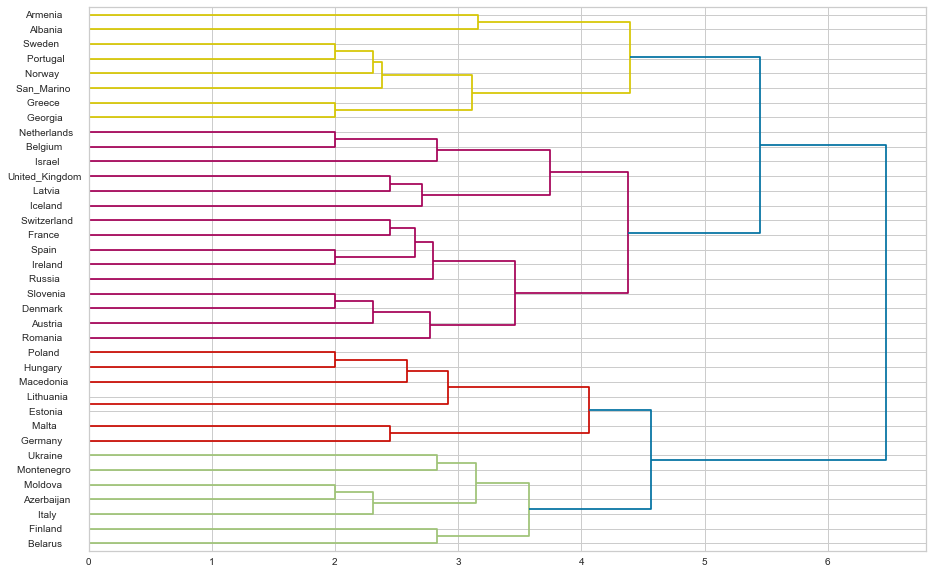

In [103]:
mergings = linkage(dane2, method="ward")
plt.figure(figsize=(15,10))
dendrogram(mergings, labels=dane.index.tolist(), orientation="right", leaf_font_size=10)
plt.show()

In [104]:
?linkage

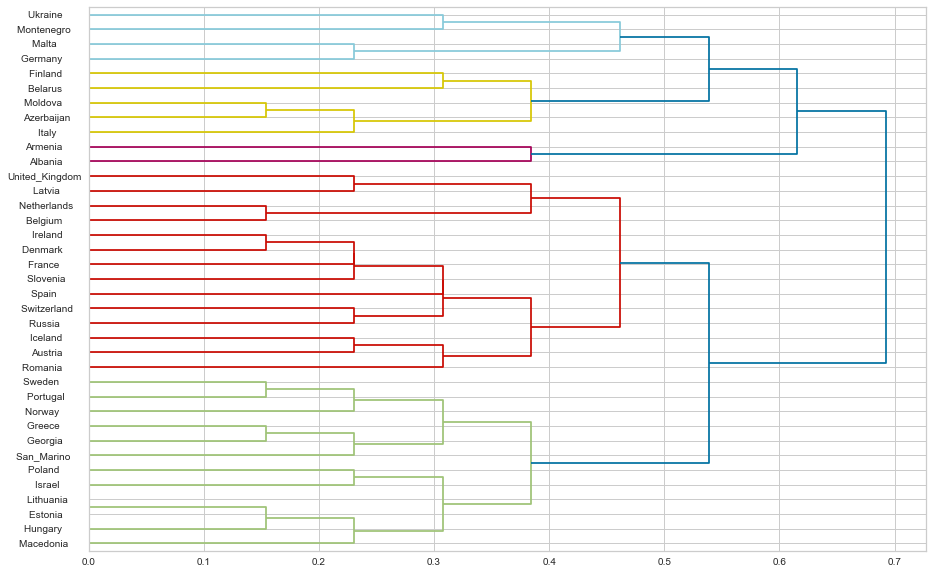

In [106]:
mergings = linkage(dane2, method="complete",metric="hamming")
plt.figure(figsize=(15,10))
dendrogram(mergings, labels=dane.index.tolist(), orientation="right", leaf_font_size=10)
plt.show()

In [107]:
from sklearn.cluster import AgglomerativeClustering
?AgglomerativeClustering

In [108]:
agg_clust = AgglomerativeClustering(n_clusters=3, linkage="ward")

In [109]:
agg_clust.fit_predict(dane)

array([2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

zoo dataset

In [113]:
import sklearn.datasets
zoo = sklearn.datasets.fetch_openml('zoo')
zoo


C:\Users\Bogdan\AppData\Roaming\Python\Python38\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name zoo exist. Versions may be fundamentally different, returning version 1.
  warn(


{'data':       hair feathers   eggs   milk airborne aquatic predator toothed backbone  \
 0     true    false  false   true    false   false     true    true     true   
 1     true    false  false   true    false   false    false    true     true   
 2    false    false   true  false    false    true     true    true     true   
 3     true    false  false   true    false   false     true    true     true   
 4     true    false  false   true    false   false     true    true     true   
 ..     ...      ...    ...    ...      ...     ...      ...     ...      ...   
 96    true    false  false   true    false   false    false    true     true   
 97    true    false   true  false     true   false    false   false    false   
 98    true    false  false   true    false   false     true    true     true   
 99   false    false   true  false    false   false    false   false    false   
 100  false     true   true  false     true   false    false   false     true   
 
     breathes veno

In [114]:
zoo_data = pd.DataFrame(zoo.data)
zoo_data.columns = zoo.feature_names

In [115]:
zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true
1,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true
2,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false
3,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true
4,true,false,false,true,false,false,true,true,true,true,false,false,4.0,true,false,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,true,false,false,true,false,false,false,true,true,true,false,false,2.0,true,false,true
97,true,false,true,false,true,false,false,false,false,true,true,false,6.0,false,false,false
98,true,false,false,true,false,false,true,true,true,true,false,false,4.0,true,false,true
99,false,false,true,false,false,false,false,false,false,true,false,false,0.0,false,false,false


Zróbmy klasteryzację i zwizualizujmy dendrogram